# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `2` | `Questions`

### <font color = green> Activation of necessary libraries. </font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### <font color = "blue"> `IMPORT` your dataset: `bank_loan.csv`. </font>

In [2]:
loan_df = pd.read_csv("bank_loan.csv")

/var/folders/wb/qzrcgmhs6t7182jnxtznddxr0000gn/T/ipykernel_35124/2076109485.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv("bank_loan.csv")


### Question 1. Data `Inspection`

#### Question 1.1. How would you look at the first few rows of the DF?

In [3]:
loan_df.head() # first 5 rows of the data frame 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
print(loan_df)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ...  \
0       36 months   10.65%       162.87     B        B2  ...   
1       60 months   15.27%     

#### Question 1.2. How would you look at all the column names?

In [5]:
column_name = pd.DataFrame(loan_df.columns)
print(column_name)

                              0
0                            id
1                     member_id
2                     loan_amnt
3                   funded_amnt
4               funded_amnt_inv
..                          ...
106                   tax_liens
107             tot_hi_cred_lim
108           total_bal_ex_mort
109              total_bc_limit
110  total_il_high_credit_limit

[111 rows x 1 columns]


### Question 2. Data `Wrangling`

#### Question 2.1. How would you check the number of missing values in each column?

In [6]:
number_of_missing_values = loan_df.isnull().sum()
pd.DataFrame(number_of_missing_values)

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
...,...
tax_liens,39
tot_hi_cred_lim,39717
total_bal_ex_mort,39717
total_bc_limit,39717


> There are columns have a large number of missing values 

> Let's clean them first.

#### Question 2.2. How would you find the percentage of missing values in each column? 
> Hint: Use the missing values and divide it by something.

In [7]:
# compute the percentage of missing values in each column
missing_df = pd.DataFrame()
missing_df['Number_of_Missing_Values'] = loan_df.isnull().sum() 
missing_df['Percentage_of_Missing_Values'] = missing_df['Number_of_Missing_Values'] / len(loan_df)
missing_df

,Number_of_Missing_Values,Percentage_of_Missing_Values
id,0,0.000000
member_id,0,0.000000
loan_amnt,0,0.000000
funded_amnt,0,0.000000
funded_amnt_inv,0,0.000000
...,...,...
tax_liens,39,0.000982
tot_hi_cred_lim,39717,1.000000
total_bal_ex_mort,39717,1.000000
total_bc_limit,39717,1.000000


#### Question 2.3. How would you remove the columns having more than 90% missing values?

In [8]:
# return the column name with the column having more than 90% missing values
morethan90 = missing_df["Percentage_of_Missing_Values"][missing_df['Percentage_of_Missing_Values'] > 0.9].index
# drop the column having more than 90% missing values
loan_df = loan_df.drop(morethan90, axis = 1)
# print the data frame
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


> Let's check the number of missing values again.

In [9]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### Question 2.4. How would you remove columns having more than 30% of missing values?
> Hint: With so **few** columns with more than 30% missing values, can you `drop` them by **name**?

In [10]:
missing_df1 = missing_df.copy()
missing_df1 = missing_df1.drop(morethan90)
morethan30 = missing_df1['Percentage_of_Missing_Values'][missing_df1['Percentage_of_Missing_Values'] > 0.3].index
loan_df = loan_df.drop(morethan30, axis = 1)
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


> Let's check number of missing values again, does all columns have **less than** 90% missing values?

In [11]:
missing_df1 = missing_df1.drop(morethan30)
missing_df1
# all columns have less than 90% missing values and also have less than 30% missing values

,Number_of_Missing_Values,Percentage_of_Missing_Values
id,0,0.000000
member_id,0,0.000000
loan_amnt,0,0.000000
funded_amnt,0,0.000000
funded_amnt_inv,0,0.000000
term,0,0.000000
int_rate,0,0.000000
installment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000


#### Question 2.5. How would you check missing values rows-wise, by the way?
> Hint: What does the `axis` argument do?

In [12]:
# check the number of missing values by rows
loan_df.isnull().sum(axis = 1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

> How would you check whether some rows have more than 5 missing values

In [13]:
missingrow_df = pd.DataFrame()
missingrow_df['number_of_missing_value_by_row'] = loan_df.isnull().sum(axis = 1)
len(missingrow_df['number_of_missing_value_by_row'][missingrow_df['number_of_missing_value_by_row'] > 5])
# as the length for the row have more than 5 missing values is 0, so there is no rows have more than 5 missing values

0

> The dataset is cleaned now; let's check whether all the columns are in the correct format or not.

In [14]:
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


> The column `int_rate` is character type, let's convert it to float.

#### Question 2.6. How would you use `lambda` to convert the data type of `int_rate`?

In [15]:
loan_df['int_rate'] = loan_df['int_rate'] \
.apply(lambda x: float(x.replace('%', ''))/100)

> Let's check the data types again.

In [16]:
type(loan_df['int_rate'][0])

numpy.float64

In [17]:
loan_df['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object

> Lets extract the numeric part from the variable employment length.

> First, let's drop the missing values from the column (otherwise the regex code below throws error) using regular expression to extract numeric values from the string convert to numeric

In [18]:
df2 = pd.DataFrame()
df2['emp_length'] = loan_df['emp_length'].dropna()
df2

,emp_length
0,10+ years
1,< 1 year
2,10+ years
3,10+ years
4,1 year
...,...
39712,4 years
39713,3 years
39714,< 1 year
39715,< 1 year


In [19]:
df2['emp_length'] = df2['emp_length'].apply(lambda x: x.strip("years<+ "))
loan_df['emp_length'] = df2['emp_length'].astype('float')


In [20]:
# extract the numeric values from the string
loan_df['emp_length']

0        10.0
1         1.0
2        10.0
3        10.0
4         1.0
         ... 
39712     4.0
39713     3.0
39714     1.0
39715     1.0
39716     1.0
Name: emp_length, Length: 39717, dtype: float64

> Let's take a look at type of the columns again

In [21]:
loan_df.info() # the column of emp_length and int_rate are float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  float64
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  float64
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Question 3. Exploratory Data Analysis (EDA)

> There are some variables not available at the time of loan application, and thus they cannot be used as predictors for credit approval. 

In [22]:
variables_to_remove = [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

variables_to_remove

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

#### Question 3.1. How would you remove the set of variables from `variables_to_remove` from the dataset?

In [23]:
column_names = loan_df.columns
for i in variables_to_remove:
    if i in column_names:
        loan_df = loan_df.drop(i, axis = 1)

loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,addr_state,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,AZ,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,GA,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,IL,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,CA,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,OR,17.94,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,0.0807,78.42,A,A4,...,CO,11.33,f,NaN,1,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,0.1028,275.38,C,C1,...,NC,6.40,f,NaN,1,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,0.0807,156.84,A,A4,...,MA,2.30,f,NaN,1,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,0.0743,155.38,A,A2,...,MD,3.72,f,NaN,1,0,NaN,0,NaN,NaN


#### Question 3.2. Are there any other variables that we can remove from the dataset also?

-  Also, we won't use the variables zip code, address, state etc. 
-  The variable `title` is derived from the variable `purpose` thus let get rid of all these variables as well

In [24]:
variables_to_remove2 = ['zip_code', 'addr_state', 'title']
column_names2 = loan_df.columns
for i in variables_to_remove2:
    if i in column_names2:
        loan_df = loan_df.drop(i, axis = 1)
        
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,car,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,small_business,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,other,20.00,f,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,0.1269,67.79,B,B5,...,other,17.94,f,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,0.0807,78.42,A,A4,...,home_improvement,11.33,f,NaN,1,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,0.1028,275.38,C,C1,...,credit_card,6.40,f,NaN,1,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,0.0807,156.84,A,A4,...,debt_consolidation,2.30,f,NaN,1,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,0.0743,155.38,A,A2,...,other,3.72,f,NaN,1,0,NaN,0,NaN,NaN


#### Question 3.3. Let's have a look at the target variable--`loan_status`. 

> Objecive: Re-label the values to a `binary form`: namely, `0` or `1`, 
>
> - 1 indicating that the person has defaulted and 
> - 0 otherwise.

But first, what makes up the target variable--`loan_status`?

In [25]:
loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

> You should be able to see that `fully paid` comprises most of the loans. 

> The ones marked `current` are neither fully paid not defaulted, so let's get rid of the current loans. 

> Hence, we will have two categories to label as 0 or 1.

- Filter for `Fully Paid` and `Charged Off` 
- Using `lambda`, let's label `Fully Paid` and `Charged Off`

In [26]:
loan_df['label'] = loan_df['loan_status'].apply(lambda x: False if x == 'Current' else True)

In [27]:
loan_df = loan_df.drop(loan_df[loan_df.label == False].index)
loan_df.loan_status

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
5         Fully Paid
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 38577, dtype: object

> Let's convert `loan_status` to **integer data type** (again, use `lambda`).

In [28]:
loan_df.loan_status = loan_df.loan_status.apply(lambda x: int(1) if x == 'Charged Off' else int(0))
loan_df.loan_status

0        0
1        1
2        0
3        0
5        0
        ..
39712    0
39713    0
39714    0
39715    0
39716    0
Name: loan_status, Length: 38577, dtype: int64

> Let's take a look at the data points under the `loan_status` category.

In [29]:
loan_df.loan_status.dtype

dtype('int64')

### Question 4. A Simple Univariate Analysis

> First, let's look at the overall default rate.

#### Question 4.1. How would you calculate default rate? Please use `numpy` module.

In [30]:
import numpy as np

In [31]:
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,label
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,27.65,f,0.0,1,0,0.0,0,0.0,0.0,True
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,1.00,f,0.0,1,0,0.0,0,0.0,0.0,True
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,8.72,f,0.0,1,0,0.0,0,0.0,0.0,True
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,20.00,f,0.0,1,0,0.0,0,0.0,0.0,True
5,1075269,1311441,5000,5000,5000.0,36 months,0.0790,156.46,A,A4,...,11.20,f,0.0,1,0,0.0,0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,0.0807,78.42,A,A4,...,11.33,f,NaN,1,0,NaN,0,NaN,NaN,True
39713,90665,90607,8500,8500,875.0,36 months,0.1028,275.38,C,C1,...,6.40,f,NaN,1,0,NaN,0,NaN,NaN,True
39714,90395,90390,5000,5000,1325.0,36 months,0.0807,156.84,A,A4,...,2.30,f,NaN,1,0,NaN,0,NaN,NaN,True
39715,90376,89243,5000,5000,650.0,36 months,0.0743,155.38,A,A2,...,3.72,f,NaN,1,0,NaN,0,NaN,NaN,True


In [32]:
default_rate = str(len(loan_df[loan_df.loan_status == 1]) / len(loan_df) * 100) + "%"
default_rate

'14.586411592399617%'

> The overall default rate is about `??%`.  

> Let's visualize default rates across grade of the loan.

In [33]:
df4 = loan_df.groupby(loan_df["grade"]).sum()
df4['default_rate'] = df4.loan_status / len(loan_df) * 100
df4['default_rate']

grade
A    1.560515
B    3.693911
C    3.491718
D    2.898100
E    1.853436
F    0.826918
G    0.261814
Name: default_rate, dtype: float64

<AxesSubplot:xlabel='grade'>

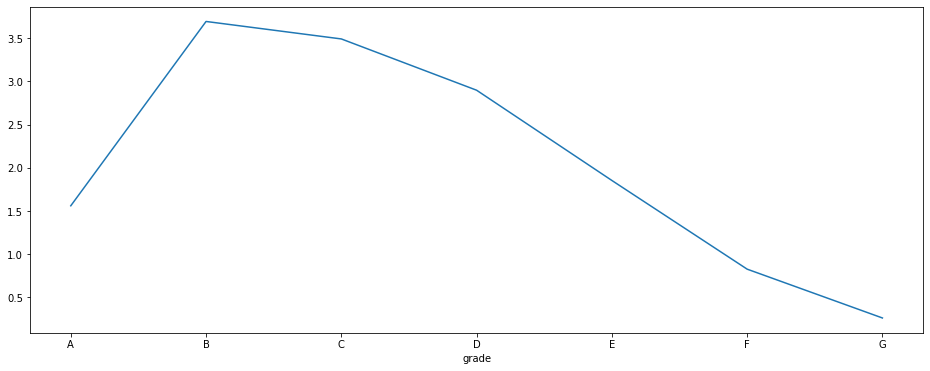

In [34]:
df4['default_rate'].plot(figsize = (16, 6))

#### Question 4.2. Create a function to plot `loan_status` across `any categorical variable`.
> Hint: How did you visualise in Question 4.1? Is there a way to generalise what you did for `any categorical variable`?

In [35]:
def defaultrateplot(x):
    df = pd.DataFrame()
    df = loan_df.groupby(loan_df[x]).sum()
    df['default_rate'] = df.loan_status / len(loan_df) * 100
    df['default_rate'].plot(figsize = (16, 6))

#### How's default rates across `grade` of loan? Use your newly created function :)

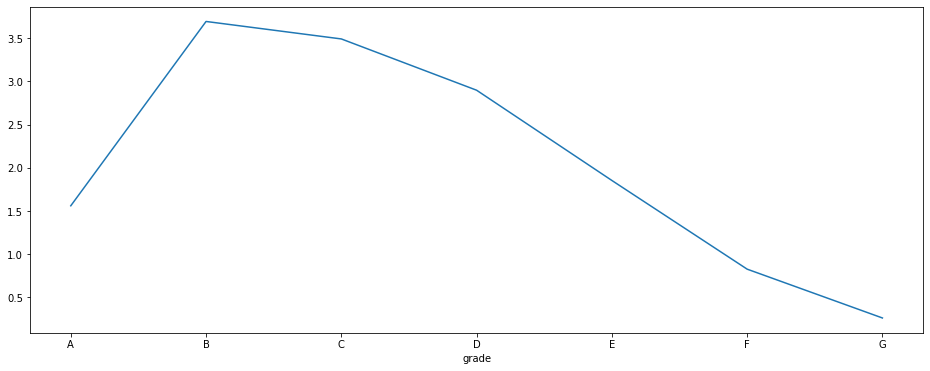

In [36]:
defaultrateplot("grade") # same as above

> What is your `interpretation`? **`Double Click` and type in your interpretation here** 

> As shown in the above line plot for the default rate across grade of loan, we could conclude that the loan with grade of B has the greatest default rate. From grade of loan B to G, the default rate of each grade of loan is decreasing, which represents the grade G for the loan has the smallest default rate. As well, there are smaller default rate for the loan grade of A compare with the loan grade of B. 

#### `term`

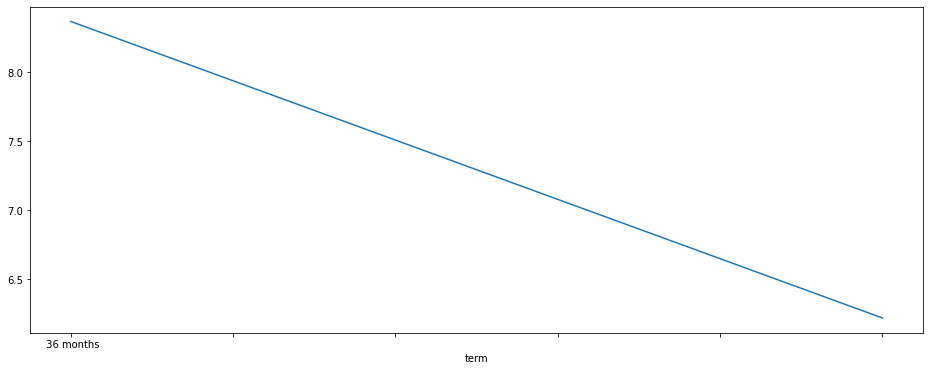

In [37]:
defaultrateplot("term")

> What is your `interpretation`? **`Double Click` and type in your interpretation here** 

> Base on the line plot for the default rate across the term of loan, we could conclude that the loan with shorter term would have higher default rate. Meanwhile, the default rate of loan would decrease sharply as the loan term increase. As we could obvious on the plot, that the loan term with 60 month has obviously smaller default rate compare with the loan with 36 months term. 

#### `home_ownership`

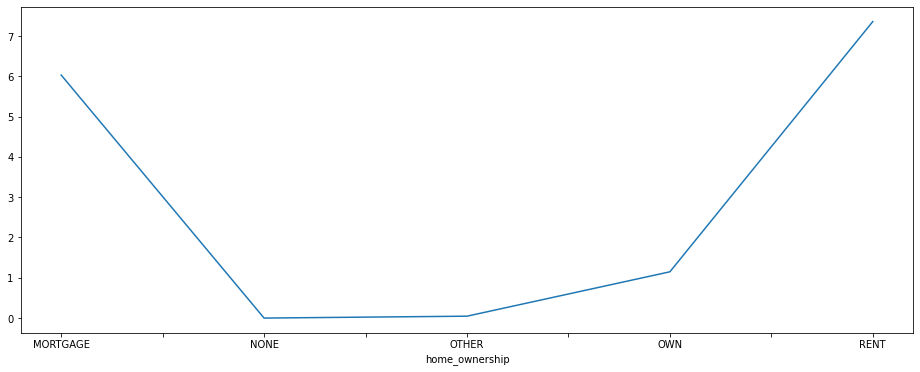

In [38]:
defaultrateplot("home_ownership")

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

Based on the line plot above, which show the default rate across different home ownership for the loans. We could conclude that the default rate for the nome, own and other home ownership is obviously lower than the other two home ownership. On the other hands, the default rate of the loan for home ownership of mortgage and rent is higher. 

#### The role of `verification_status`?

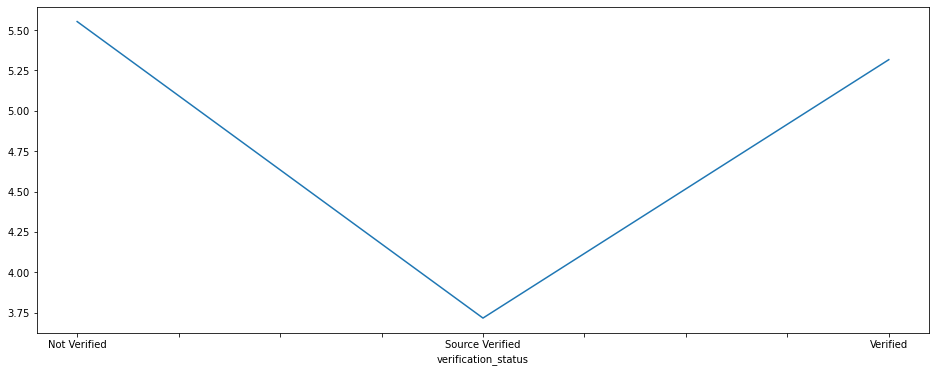

In [39]:
defaultrateplot("verification_status")

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

According to the line plot for the default rate across different vertification status for the loans, we could see that the default rate of loan with source verified is the lowest and the default rate of loan with not verified is much higher. The result demonstrate that the default rate will be lower for verified source. 

#### The role of Loan `purpose`?

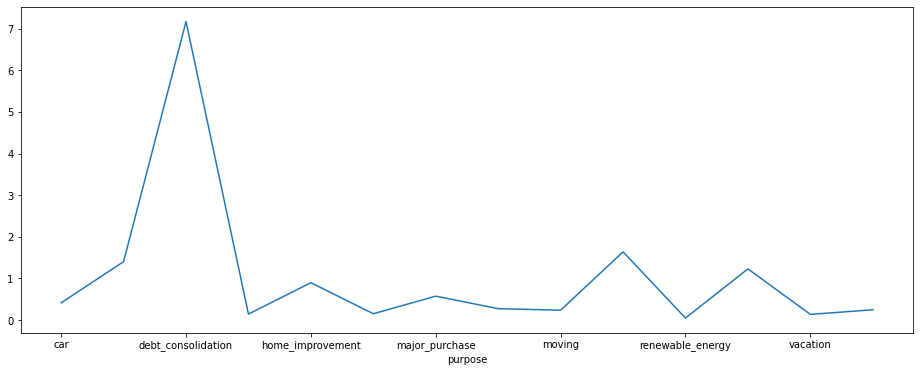

In [40]:
defaultrateplot("purpose")

> What is your `interpretation`? **`Double Click` and type in your interpretation here**

Depends on the line plot above, which shows the default rate across the different purpose for the loan. We could conclude that the default rate for the debt consolidation as purpose of loan is the highest and the default rate for the loan purpose as car, home improvement, major purchase, moving and renewable energy and vacation are similar. According to the result from the plot, which represents the default rate of the loan with debt consolidation as purpose would be the highest. 

#### Question 4.3. How is the distribution of loans across time?

> Please convert the column `issue_d` into datetime and then extract year and month from it.

In [41]:
from datetime import datetime

In [42]:
loan_df['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

> Yes, please use `lambda`.

In [43]:
loan_df['issue_d'] = loan_df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

> Please extract month and year from `issue_d`, using `lambda`.

In [44]:
loan_df['issue_year'] = pd.DatetimeIndex(loan_df['issue_d']).year.astype('str')
loan_df.issue_year

0        2011
1        2011
2        2011
3        2011
5        2011
         ... 
39712    2007
39713    2007
39714    2007
39715    2007
39716    2007
Name: issue_year, Length: 38577, dtype: object

In [45]:
loan_df['issue_month'] = pd.DatetimeIndex(loan_df['issue_d']).month
loan_df.issue_month

0        12
1        12
2        12
3        12
5        12
         ..
39712     7
39713     7
39714     7
39715     7
39716     6
Name: issue_month, Length: 38577, dtype: int64

> How would you examine the number of loans granted across `years`?

In [46]:
df5 = loan_df.copy()
df5 = df5.groupby('issue_year').count()
df5['id']

issue_year
2007      251
2008     1562
2009     4716
2010    11532
2011    20516
Name: id, dtype: int64

<AxesSubplot:xlabel='issue_year'>

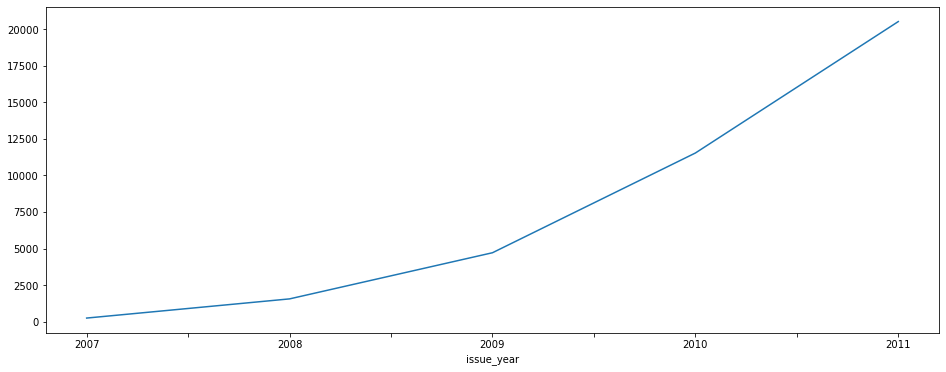

In [47]:
df5['id'].plot(figsize = (16, 6))

You can see that the number of loans has increased steadily across years. 

> How would you examine the number of loans across months?

In [48]:
df6 = loan_df.copy()
df6 = df6.groupby('issue_month').count()
df6['id'].sort_index(ascending = True)

issue_month
1     2379
2     2358
3     2691
4     2831
5     2919
6     3180
7     3351
8     3388
9     3498
10    3761
11    4006
12    4215
Name: id, dtype: int64

<AxesSubplot:xlabel='issue_month'>

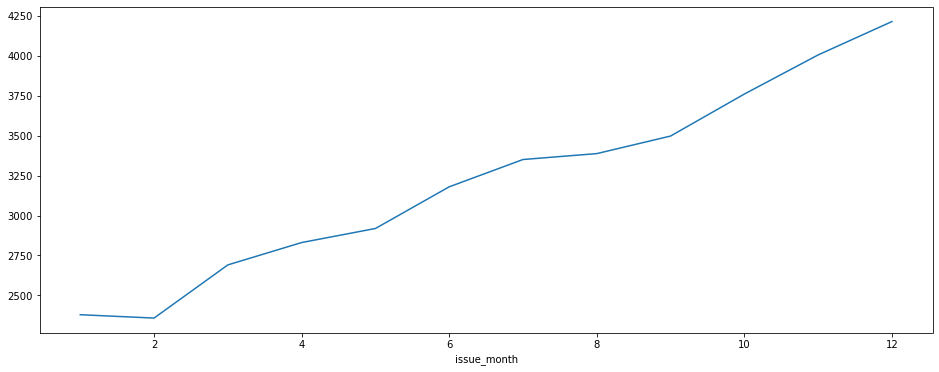

In [49]:
df6.id.sort_index().plot(figsize = (16, 6))

`Interpretation`?

Base on the numerical summary for the number of loan across the year and plot for the issue year with the number of loans across the year, we could see that there are increasing number of loan through the increase of year. The result means there are more and more number of loan in one year in the later years. 

On the other hands, depends on the numerical summary for the number of loan in the different month and the plot for the issue month with the number of loan, we could see that there are increasing number of loan in the later month as well. 

#### Compare the default rates across years.

In [50]:
df7 = loan_df.copy()
df7 = df7.groupby('issue_year').sum()
df7['default_rate'] = df7['loan_status'] / len(loan_df)
df7['default_rate']

issue_year
2007    0.001166
2008    0.006403
2009    0.015398
2010    0.038494
2011    0.084403
Name: default_rate, dtype: float64

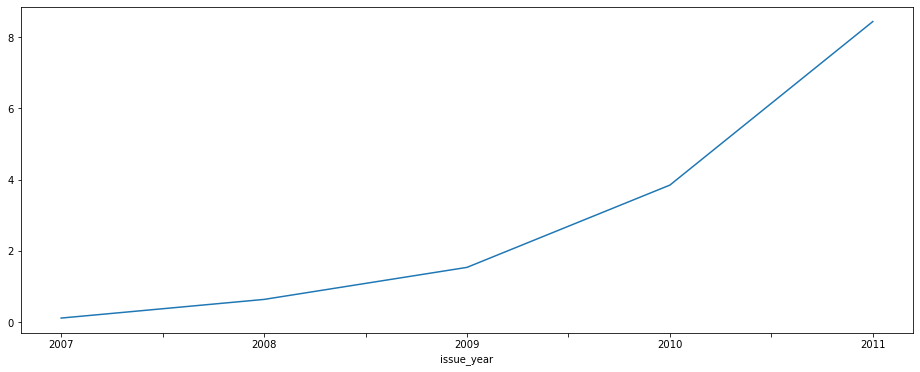

In [51]:
defaultrateplot('issue_year')

> `Interpretation`?

#### Let's compare default rates across months.

In [52]:
df8 = loan_df.copy()
df8 = df8.groupby('issue_month').sum()
df8['default_rate'] = df8['loan_status'] / len(loan_df)
df8['default_rate']

issue_month
1     0.008321
2     0.007517
3     0.008995
4     0.009591
5     0.012080
6     0.012520
7     0.012417
8     0.012132
9     0.014179
10    0.015035
11    0.015501
12    0.017575
Name: default_rate, dtype: float64

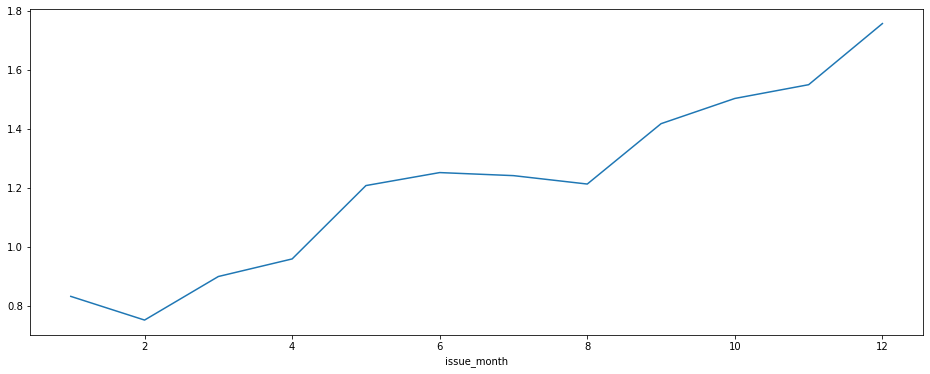

In [53]:
defaultrateplot('issue_month')

> `Interpretation`? 

Firstly, according to the line plot for the default rate across the issue year, we could see the default rate is increasing throughout the year. From 2010 to 2011, the default rate increases sharply. The default rate for the loan increases smoothly from 2007 to 2009. 

Secondly, according to the line plot for the default rate across the issue month for the loan, we could see the default rate is increasing sharply from January to May. As well, the default rate stay constant from May to Augest. Moreover, the default rate is incrasing sharply again from Augest to December. Overall, the default rate for the loan is higher obviously in the later month in the year. 

#### Question 4.4. Let's now analyse how the default rate varies across continuous variables.

> Loan Amount: `loan_amnt`

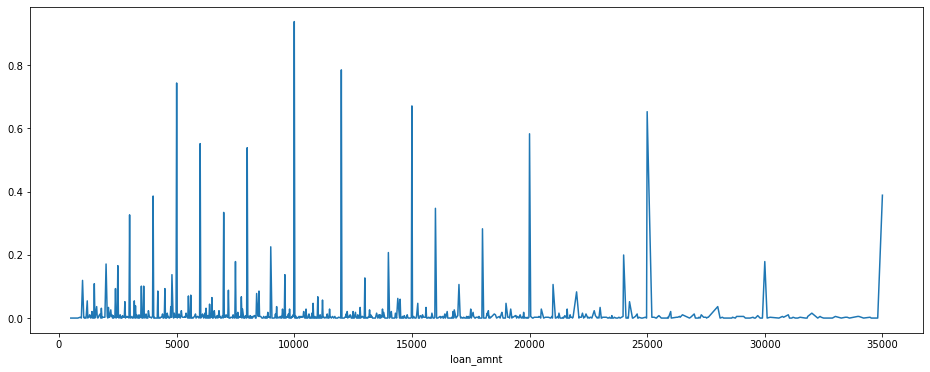

In [54]:
defaultrateplot('loan_amnt')

> `Interpretation`?

Depends on the line plot, which shows the default rate with various loan amount. The plot shows that there is the highest default rate with the loan has 10000 loan amount. As well, the default rate of loan are high for the various loan amount. The frequency of default rate is more in the loan with low and medium loan amount. Moreover, the frequency of default rate is less in the loan with high loan amount. 

> Another way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

> Let's create a categorical variable for the loan amount variable into small, medium, high, very high.

* loan_amount < 5000 `low`
* loan_amount >=5000 and loan_amount < 15000 `medium`
* loan_amount >= 15000 and loan_amount < 25000 `high`
* greater than 25000 `very high`

In [55]:
# def categorical_amnt(x):
#     if x < 5000:
#         return 'low'
#     elif x >= 5000 and x < 15000:
#         return 'medium'
#     elif x >= 15000 and x < 25000:
#         return 'high'
#     else:
#         return 'very high'

loan_df['categorical_loan_amnt'] = loan_df['loan_amnt'].apply(lambda x: 'low' if x < 5000 \
                                                              else('medium' if x >= 5000 and x < 15000 \
                                                                  else ('high' if x >= 15000 and x < 25000 \
                                                                        else 'very high')))

In [56]:
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,label,issue_year,issue_month,categorical_loan_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,1,0,0.0,0,0.0,0.0,True,2011,12,medium
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,1,0,0.0,0,0.0,0.0,True,2011,12,low
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,1,0,0.0,0,0.0,0.0,True,2011,12,low
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,1,0,0.0,0,0.0,0.0,True,2011,12,medium
5,1075269,1311441,5000,5000,5000.0,36 months,0.0790,156.46,A,A4,...,1,0,0.0,0,0.0,0.0,True,2011,12,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,0.0807,78.42,A,A4,...,1,0,NaN,0,NaN,NaN,True,2007,7,low
39713,90665,90607,8500,8500,875.0,36 months,0.1028,275.38,C,C1,...,1,0,NaN,0,NaN,NaN,True,2007,7,medium
39714,90395,90390,5000,5000,1325.0,36 months,0.0807,156.84,A,A4,...,1,0,NaN,0,NaN,NaN,True,2007,7,medium
39715,90376,89243,5000,5000,650.0,36 months,0.0743,155.38,A,A2,...,1,0,NaN,0,NaN,NaN,True,2007,7,medium


> Let's compare the default rates across loan amount type

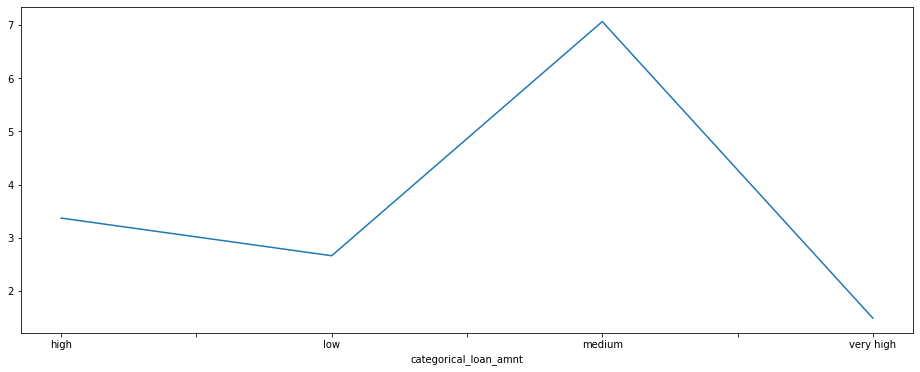

In [57]:
defaultrateplot('categorical_loan_amnt')

> `Interpretation`?

Based on the above line plot for the default rate across various loan amount level, we could see that the default rate is highest for the medium loan amount, which is similar with the numerical loan amount. Moreover, the default rate for the loan decreases as increase in the loan amount. As the loan amount with high and very high, the default rate is obviously smaller than the medium loan amount. The results similar with the line plot of default rate across numerical loan amount. 

#### Let's also convert funded amount invested to bins (using the same scheme from `loan_amount`)

In [58]:
loan_df['categorical_funded_amnt'] = loan_df.funded_amnt.apply(lambda x: 'low' if x < 5000 \
                                                              else('medium' if x >= 5000 and x < 15000 \
                                                                  else ('high' if x >= 15000 and x < 25000 \
                                                                        else 'very high')))
loan_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,label,issue_year,issue_month,categorical_loan_amnt,categorical_funded_amnt
0,1077501,1296599,5000,5000,4975.0,36 months,0.1065,162.87,B,B2,...,0,0.0,0,0.0,0.0,True,2011,12,medium,medium
1,1077430,1314167,2500,2500,2500.0,60 months,0.1527,59.83,C,C4,...,0,0.0,0,0.0,0.0,True,2011,12,low,low
2,1077175,1313524,2400,2400,2400.0,36 months,0.1596,84.33,C,C5,...,0,0.0,0,0.0,0.0,True,2011,12,low,low
3,1076863,1277178,10000,10000,10000.0,36 months,0.1349,339.31,C,C1,...,0,0.0,0,0.0,0.0,True,2011,12,medium,medium
5,1075269,1311441,5000,5000,5000.0,36 months,0.0790,156.46,A,A4,...,0,0.0,0,0.0,0.0,True,2011,12,medium,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,0.0807,78.42,A,A4,...,0,NaN,0,NaN,NaN,True,2007,7,low,low
39713,90665,90607,8500,8500,875.0,36 months,0.1028,275.38,C,C1,...,0,NaN,0,NaN,NaN,True,2007,7,medium,medium
39714,90395,90390,5000,5000,1325.0,36 months,0.0807,156.84,A,A4,...,0,NaN,0,NaN,NaN,True,2007,7,medium,medium
39715,90376,89243,5000,5000,650.0,36 months,0.0743,155.38,A,A2,...,0,NaN,0,NaN,NaN,True,2007,7,medium,medium


> Visualize the results

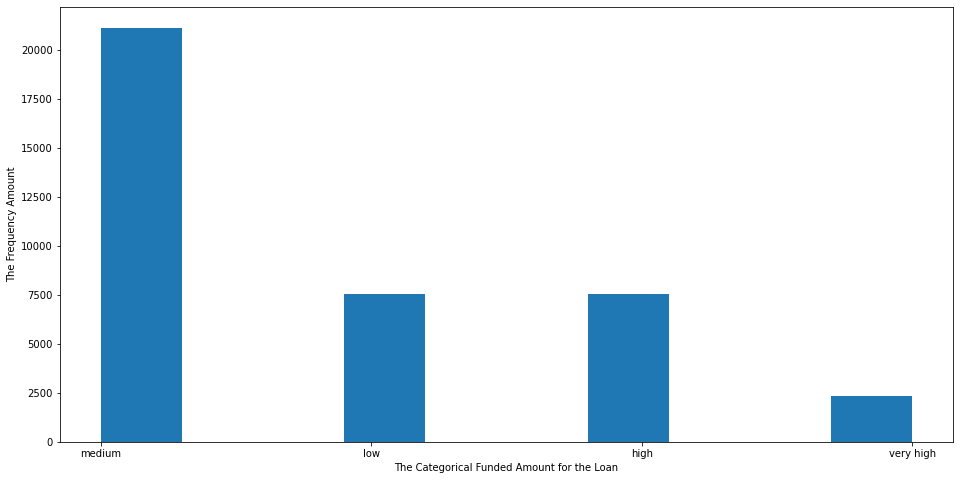

In [59]:
plt.figure(figsize = (16, 8))

# plot the frequency of the categorical funded amount
plt.hist(loan_df['categorical_funded_amnt'])

plt.xlabel("The Categorical Funded Amount for the Loan")
plt.ylabel("The Frequency Amount")
plt.show()

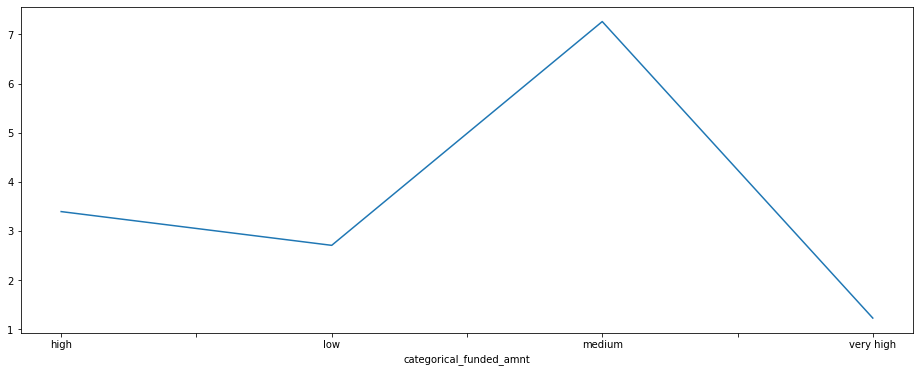

In [60]:
# plot the default rate of the loan across the various categorical funded amount
defaultrateplot('categorical_funded_amnt')

#### Interest Rate (int_rate)

> Use the following definitions for each categories.

* <= 10 `low`
* dti > 10 and dti <=15 `medium`
* greater than 15 `high`

> Use lambda for creating a new categorical variable.

In [80]:
loan_df['categorical_int_rate'] = loan_df.int_rate.apply(lambda x: 'low' if x <= 10 \
                                                        else('medium' if x > 10 and x <= 15 \
                                                            else 'high'))

> Let's compare default rates across rates of interest

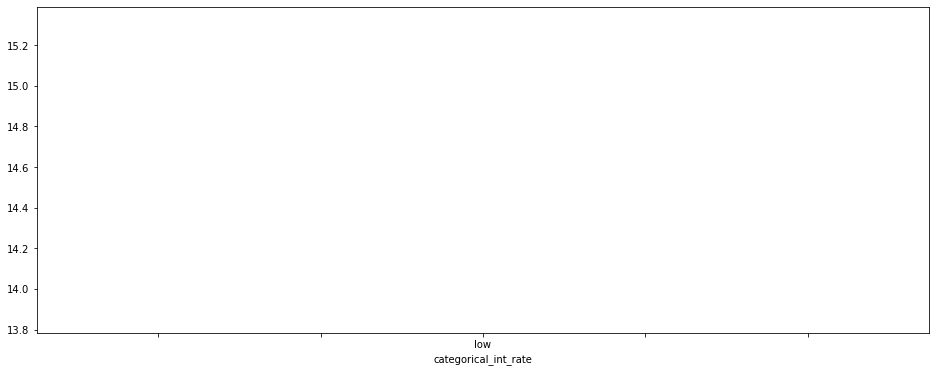

In [62]:
defaultrateplot('categorical_int_rate')


> `Interpretaion`?

#### debt-to-income (`dti`) ratio

> Please create a categorical variable of `dti` using your own function

> Use the following definitions for each categories.

* <= 10 `low`
* dti > 10 and dti <=20 `medium`
* greater than 20 `high`

> Use lambda for creating a new variable.

In [63]:
loan_df['categorical_dti'] = loan_df.dti.apply(lambda x: 'low' if x <= 10 \
                                                        else('medium' if x > 10 and x <= 20 \
                                                            else 'high'))

> Let's comparing default rates across debt to income ratio

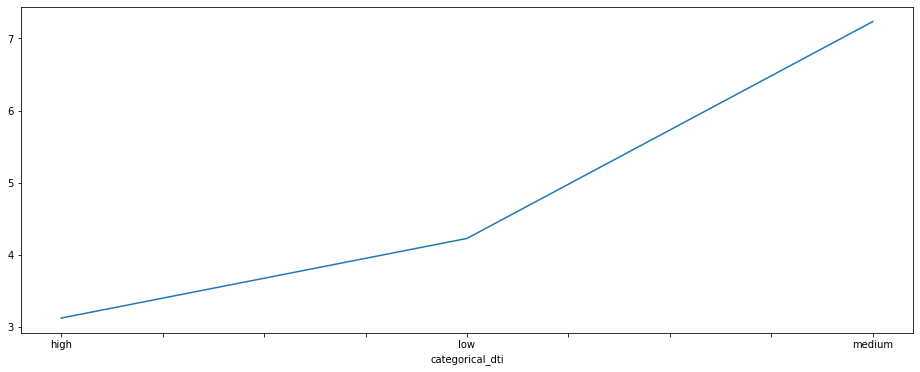

In [64]:
defaultrateplot('categorical_dti')


> `Interpretation`?

According to above line plot, which shows the default rate for loan across the categorical debt-to-income ratio. We could conclude that the default rate for the loan with medium debt-to-income ratio is the highest and the default rate for the loan with high debt-to-income ratio is the lowest. 

#### `funded_amount`

> Please create a categorical variable of `funded_amount` using your own function

> Use the following definitions for each categories.

- <= 5000 `low`
- funded_amount > 5000 and funded_amount <=15000 `medium`
- greater than 15000 `high`

> Use lambda for creating a new variable.

In [65]:
loan_df['categorical_funded_amnt'] # done above


0        medium
1           low
2           low
3        medium
5        medium
          ...  
39712       low
39713    medium
39714    medium
39715    medium
39716    medium
Name: categorical_funded_amnt, Length: 38577, dtype: object

#### `installment`

> Please create a categorical variable of `installment` using your own function

> Use the following definitions for each categories.

- installment <= 200 `low`
- installment > 200 and installment <= 400 `medium`
- installment > 400 and installment <= 600 `high`
- greater than 600 = `very high`

> Use lambda for creating a new variable.

In [66]:
loan_df['categorical_install'] = loan_df.installment.apply(lambda x: 'low' if x <= 200 \
                                                          else('medium' if x > 200 and x <= 400 \
                                                              else('high' if x > 400 and x <=600 else 'very high')))


> Let's compare default rates across installment

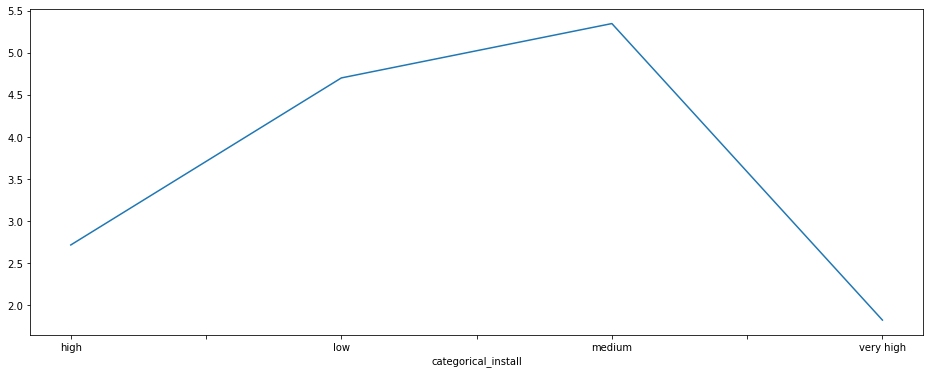

In [67]:
defaultrateplot('categorical_install')

> `Interpretation`?

According to above line plot, which shows the default rate across the various installment levels. We could demonstrate that the default rate is large with the low and medium installment level for the loan. Moreover, the default rate is smaller with the high and very high installment level for the loan. 

#### How about `annual_income`? 

> Please create a categorical variable of annual_income using your own function

> Use the following definitions for each categories.

- less than or equal to 50k = `low`
- greater than 50k less than equal to 100 k = `medium`
- greater than 100k less than equal to 150k = `high`
- greater than 150k = `very high`

> Use lambda for creating a new variable.

In [68]:
loan_df['categorical_annual_inc'] = loan_df['annual_inc'].apply(lambda x: 'low' if x <= 50000 \
                                                               else('medium' if x > 50000 and x <= 100000 \
                                                                   else('high' if x > 100000 and x <= 150000 \
                                                                       else 'very high')))



> Visualize the results.

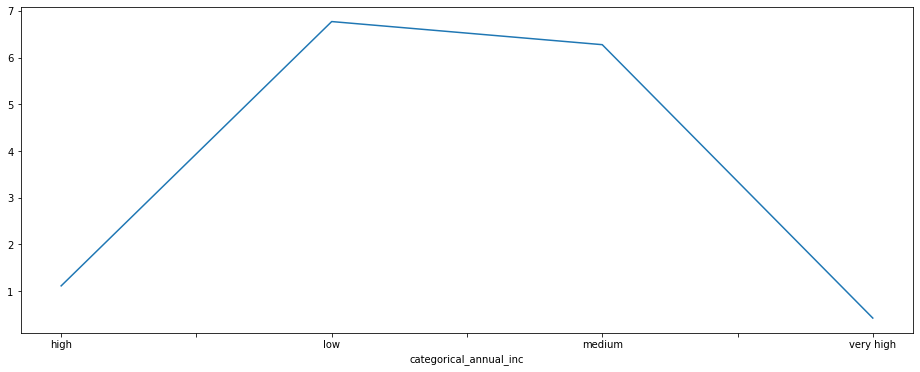

In [69]:
defaultrateplot('categorical_annual_inc')


> What's your interpretation?

According to the line plot above, which shows the default rate across the various annual income level for the loan. We could conclude that there are higher default rate for the low and medium annual income of loan. As well, the default rate is lower for the loan with high and very high annual income. 

#### `Employment Length`

> First, let's drop the missing value observations in `emp_length`

In [70]:
df17 = pd.DataFrame()
df17['loan_status'] = loan_df['loan_status']
df17['emp_length'] = loan_df['emp_length']
df17 = df17.dropna()
df17

,loan_status,emp_length
0,0,10.0
1,1,1.0
2,0,10.0
3,0,10.0
5,0,3.0
...,...,...
39712,0,4.0
39713,0,3.0
39714,0,1.0
39715,0,1.0


> Please create a categorical variable of `emp_length` using your own function

> Use the following definitions for each categories.

* emp_length <= 1 `fresher`
* emp_length > 1 and emp_length <=3 `junior`
* emp_length > 3 and emp_length <=7 `senior`
* greater than 7 `expert`

> Use lambda for creating a new variable.

In [71]:
df17['categorical_emp_length'] = df17['emp_length'].apply(lambda x: 'fresher' if x <= 1 \
                                                         else('junior' if x > 1 and x <= 3 \
                                                             else ('senior' if x > 3 and x <= 7 \
                                                                  else 'expert')))

> Visualize the results

<AxesSubplot:xlabel='categorical_emp_length'>

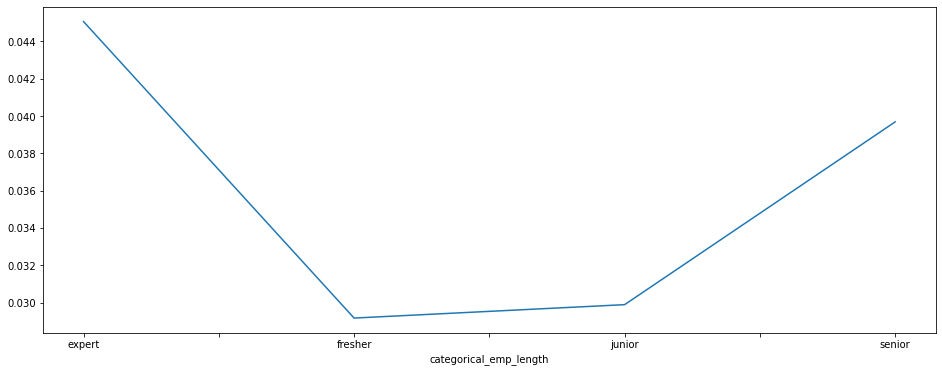

In [72]:
df17 = df17.groupby('categorical_emp_length').sum()
df17['default_rate'] = df17['loan_status'] / len(loan_df['emp_length'].dropna())
df17['default_rate'].plot(figsize = (16, 6))

In [73]:
df17

,loan_status,emp_length,default_rate
categorical_emp_length,,,
expert,1692,107394.0,0.045067
fresher,1095,7677.0,0.029166
junior,1122,20618.0,0.029885
senior,1490,54323.0,0.039687


> What's your `interetation`?

### Question 5. Segmented Univariate Analysis



#### Question 5.1. A quick glance on Loan Purpose (`purpose`) using your first function :)

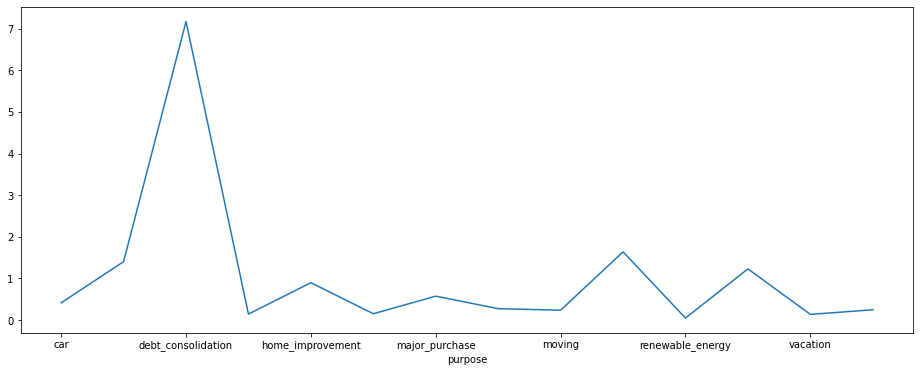

In [74]:
defaultrateplot('purpose')


`Interpretation`?

#### Question 5.2. Now let's segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate. 

> Let's take a look at the number of loans for each type (purpose) of the loan.

In [75]:
purpose_df = loan_df.copy()
purpose_df = purpose_df.groupby('purpose').count()
purpose_df


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,tax_liens,label,issue_year,issue_month,categorical_loan_amnt,categorical_funded_amnt,categorical_int_rate,categorical_dti,categorical_install,categorical_annual_inc
purpose,,,,,,,,,,,,,,,,,,,,,
car,1499,1499,1499,1499,1499,1499,1499,1499,1499,1499,...,1499,1499,1499,1499,1499,1499,1499,1499,1499,1499
credit_card,5027,5027,5027,5027,5027,5027,5027,5027,5027,5027,...,5016,5027,5027,5027,5027,5027,5027,5027,5027,5027
debt_consolidation,18055,18055,18055,18055,18055,18055,18055,18055,18055,18055,...,18048,18055,18055,18055,18055,18055,18055,18055,18055,18055
educational,325,325,325,325,325,325,325,325,325,325,...,323,325,325,325,325,325,325,325,325,325
home_improvement,2875,2875,2875,2875,2875,2875,2875,2875,2875,2875,...,2869,2875,2875,2875,2875,2875,2875,2875,2875,2875
house,367,367,367,367,367,367,367,367,367,367,...,366,367,367,367,367,367,367,367,367,367
major_purchase,2150,2150,2150,2150,2150,2150,2150,2150,2150,2150,...,2150,2150,2150,2150,2150,2150,2150,2150,2150,2150
medical,681,681,681,681,681,681,681,681,681,681,...,681,681,681,681,681,681,681,681,681,681
moving,576,576,576,576,576,576,576,576,576,576,...,575,576,576,576,576,576,576,576,576,576


> Please analyze the top 4 types of loans based on purpose

#### Let's filter the df for the 4 types of loans mentioned above

In [76]:
purpose_df = purpose_df.sort_values(by = 'id', ascending = False).head(4)
purpose_df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,tax_liens,label,issue_year,issue_month,categorical_loan_amnt,categorical_funded_amnt,categorical_int_rate,categorical_dti,categorical_install,categorical_annual_inc
purpose,,,,,,,,,,,,,,,,,,,,,
debt_consolidation,18055,18055,18055,18055,18055,18055,18055,18055,18055,18055,...,18048,18055,18055,18055,18055,18055,18055,18055,18055,18055
credit_card,5027,5027,5027,5027,5027,5027,5027,5027,5027,5027,...,5016,5027,5027,5027,5027,5027,5027,5027,5027,5027
other,3865,3865,3865,3865,3865,3865,3865,3865,3865,3865,...,3860,3865,3865,3865,3865,3865,3865,3865,3865,3865
home_improvement,2875,2875,2875,2875,2875,2875,2875,2875,2875,2875,...,2869,2875,2875,2875,2875,2875,2875,2875,2875,2875


#### Visualize the number of loans by purpose 

<AxesSubplot:xlabel='purpose'>

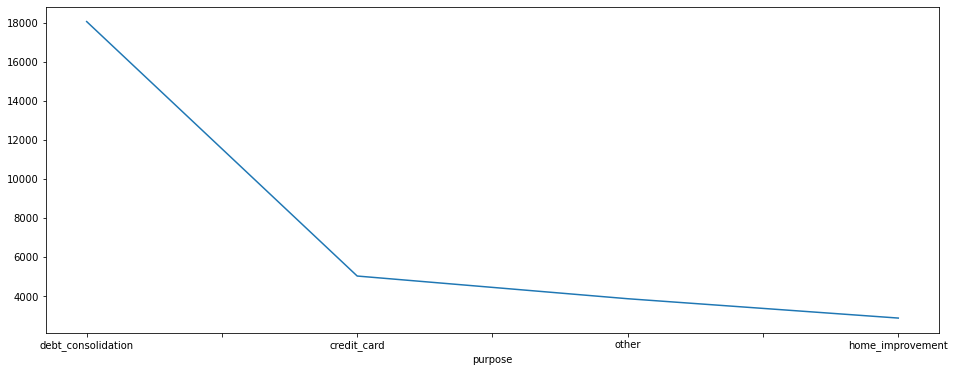

In [77]:
purpose_df['id'].plot(figsize = (16, 6))



> let's now compare the default rates (`loan_status`) across two types of categorical variables;
> - `purpose` of loan (constant)
> - another categorical variable (which changes)

In [78]:
loan_df1 = loan_df.copy()
loan_df1 = loan_df[loan_df.purpose.isin(purpose_df.index)]
loan_df1['purpose'].unique()

array(['credit_card', 'other', 'debt_consolidation', 'home_improvement'],
      dtype=object)

In [91]:
index_df = loan_df1.copy()
index_df = index_df.groupby('categorical_annual_inc').sum()
index_df.index


Index(['high', 'low', 'medium', 'very high'], dtype='object', name='categorical_annual_inc')

In [92]:
joint_df = loan_df1.copy()
joint_df = joint_df.groupby(['purpose', 'categorical_annual_inc']).sum()
joint_df['default_rate'] = joint_df['loan_status'] / len(loan_df)
joint_df

id   member_id  loan_amnt  \
purpose            categorical_annual_inc                                      
credit_card        high                     394693958   490591426    9581700   
                   low                     1298788349  1608499111   15476275   
                   medium                  1647210997  2044526078   29698400   
                   very high                118072234   146171212    3413125   
debt_consolidation high                    1197353295  1495137532   30544550   
                   low                     4891061794  6091523299   64813575   
                   medium                  5960913315  7430215228  118844800   
                   very high                412405723   514078637   11547000   
home_improvement   high                     329919210   412074221    7001925   
                   low                      518103760   646868820    5714150   
                   medium                   922006488  1150615611   15191575   
                   very high                167596698   209072712    4602850   
other              high                     205704549   255883574    3797250   
                   low                     1158340379  1440638575   10689800   
                   medium                  1030477555  1282736865   14164975   
                   very high                 90543122   112442801    2022225   

                                           funded_amnt  funded_amnt_inv  \
purpose            categorical_annual_inc                                 
credit_card        high                        9284900     8.605517e+06   
                   low                        15211325     1.457368e+07   
                   medium                     28992150     2.753266e+07   
                   very high                   3341825     3.114596e+06   
debt_consolidation high                       29663475     2.840721e+07   
                   low                        63770600     6.059612e+07   
                   medium                    115787275     1.103795e+08   
                   very high                  11201425     1.083067e+07   
home_improvement   high                        6768125     6.425510e+06   
                   low                         5544100     5.252619e+06   
                   medium                     14844750     1.406565e+07   
                   very high                   4458425     4.210692e+06   
other              high                        3692075     3.444422e+06   
                   low                        10512575     9.822074e+06   
                   medium                     13857925     1.296076e+07   
                   very high                   1940300     1.860689e+06   

                                            int_rate  installment  emp_length  \
purpose            categorical_annual_inc                                       
credit_card        high                      74.0086    283985.24      3426.0   
                   low                      207.7659    467213.64      7408.0   
                   medium                   279.0300    882969.95     12655.0   
                   very high                 23.5225    104832.73      1030.0   
debt_consolidation high                     223.8594    885101.00     10047.0   
                   low                      864.6221   1921759.90     29980.0   
                   medium                  1070.3639   3431267.43     47420.0   
                   very high                 79.3444    335961.36      3363.0   
home_improvement   high                      54.5956    195278.49      2941.0   
                   low                       83.8477    162783.69      3693.0   
                   medium                   155.9337    427846.73      8215.0   
                   very high                 30.1546    132192.10      1556.0   
other              high                      38.1388    112064.00      1914.0   
                   low                      

In [93]:
creditcard_rate = joint_df.loc[['credit_card']]['default_rate'].values
debt_rate = joint_df.loc[['debt_consolidation']].default_rate.values
home_rate = joint_df.loc[['home_improvement']].default_rate.values
other_rate = joint_df.loc[['other']].default_rate.values

In [94]:
loan_df.categorical_annual_inc.unique()

array(['low', 'medium', 'high', 'very high'], dtype=object)

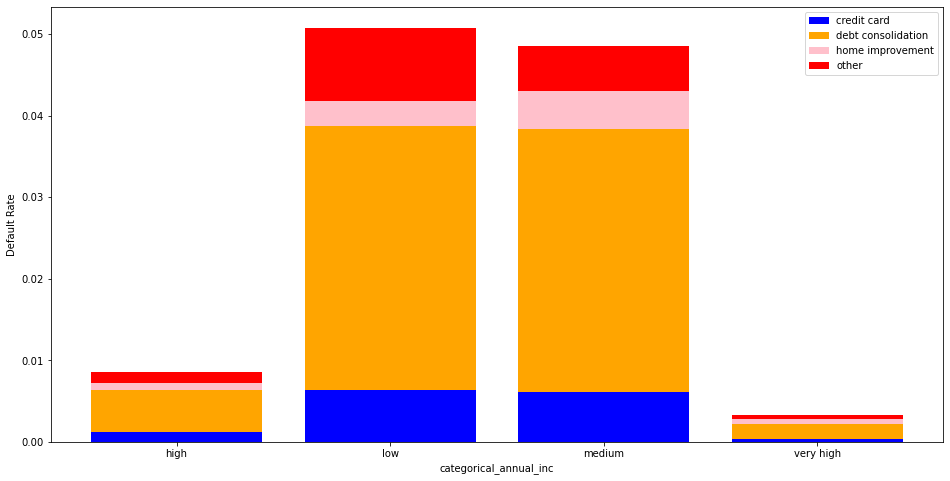

In [95]:
fig = plt.figure(figsize = (16, 8))
ax = fig.subplots()


ax.bar(index_df.index, creditcard_rate, color = 'blue', label = 'credit card')
ax.bar(index_df.index, debt_rate,bottom = creditcard_rate, color = 'orange', label = 'debt consolidation')
ax.bar(index_df.index, home_rate, bottom = creditcard_rate + debt_rate, color = 'pink', label = 'home improvement')
ax.bar(index_df.index, other_rate, bottom = creditcard_rate + debt_rate + home_rate, color = 'red', label = 'other')
    
plt.xlabel('categorical_annual_inc')
plt.ylabel('Default Rate')
ax.legend()
plt.show()

> You should be able to write your own function which takes a categorical variable and plots the default rate segmented by purpose.

> Please **create your function** named `plot_segmented`

In [96]:
def plot_segmented(df, variable):
    joint_df = df.copy()
    joint_df = joint_df.groupby(["purpose", variable]).sum()
    joint_df['default_rate'] = joint_df['loan_status'] / len(loan_df)
    
    index_df = df.copy()
    index_df = df.groupby(variable).sum()
    index_df.index
    
    creditcard_rate = joint_df.loc[['credit_card']]['default_rate'].values
    debt_rate = joint_df.loc[['debt_consolidation']].default_rate.values
    home_rate = joint_df.loc[['home_improvement']].default_rate.values
    other_rate = joint_df.loc[['other']].default_rate.values
    
    fig = plt.figure(figsize = (16, 8))
    ax = fig.subplots()


    ax.bar(index_df.index, creditcard_rate, color = 'blue', label = 'credit card')
    ax.bar(index_df.index, debt_rate,bottom = creditcard_rate, color = 'orange', label = 'debt consolidation')
    ax.bar(index_df.index, home_rate, bottom = creditcard_rate + debt_rate, color = 'pink', label = 'home improvement')
    ax.bar(index_df.index, other_rate, bottom = creditcard_rate + debt_rate + home_rate, color = 'red', label = 'other')
    
    plt.xlabel(variable)
    plt.ylabel('Default Rate')
    ax.legend()
    plt.show()

> Let's use the function to see if there's differences in the term.

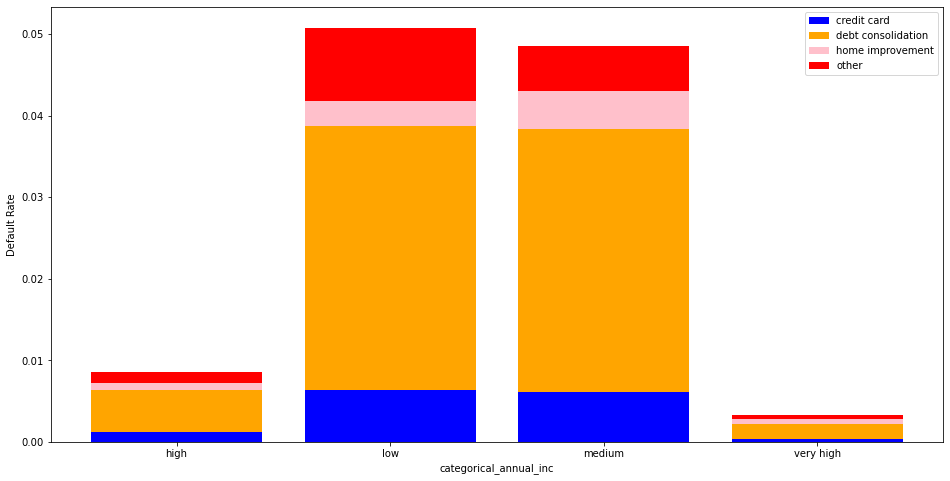

In [97]:
plot_segmented(loan_df1, 'categorical_annual_inc')

#### Grade of Loan (`grade`)

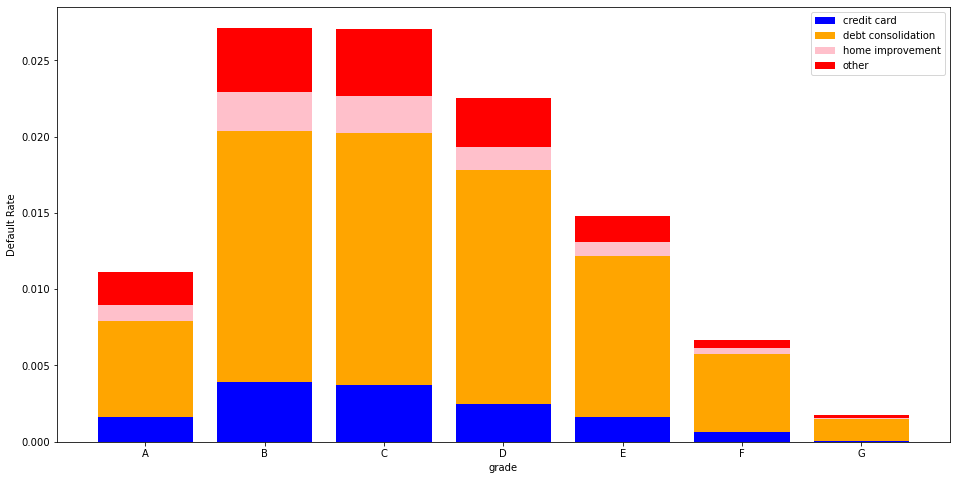

In [98]:
plot_segmented(loan_df1, 'grade')

#### home ownership(`home_ownership`)

In [89]:
loan_df2 = loan_df1.copy()
loan_df2 = loan_df2[loan_df2.home_ownership != 'NONE']

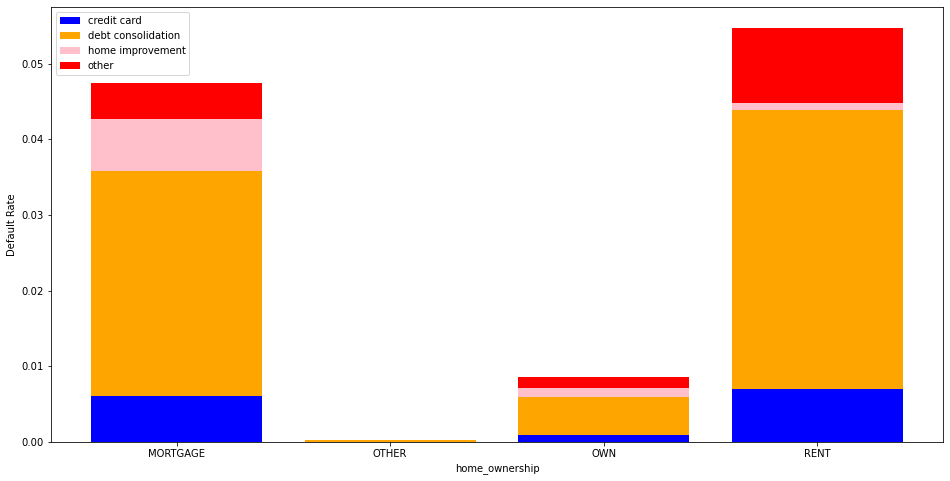

In [90]:
plot_segmented(loan_df2, 'home_ownership')

#### `year`

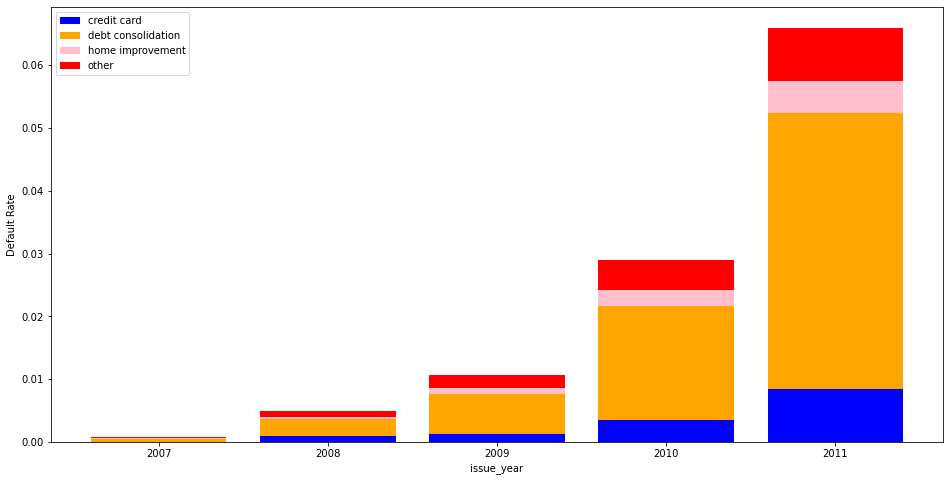

In [102]:
plot_segmented(loan_df1, 'issue_year')

#### `emp_length`

/var/folders/wb/qzrcgmhs6t7182jnxtznddxr0000gn/T/ipykernel_35124/3594005182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_df1['emp_length'] = loan_df1['emp_length'].astype(str)


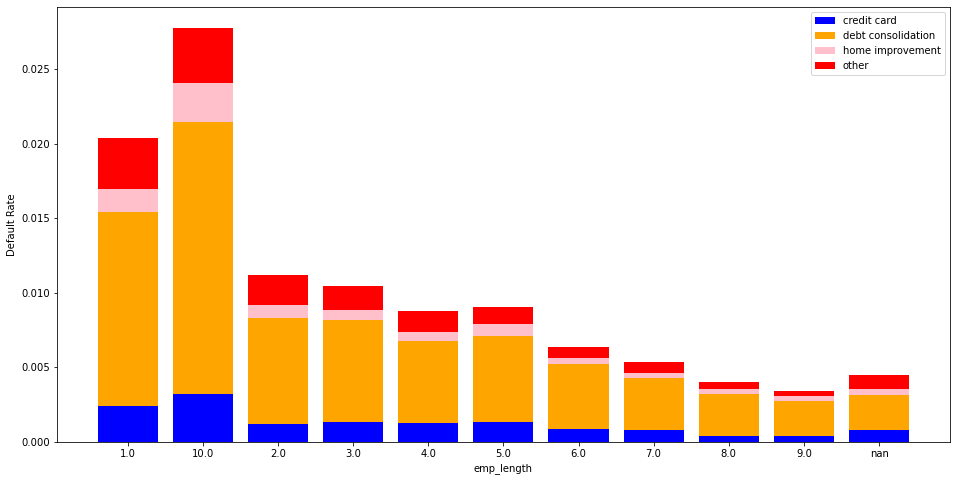

In [101]:
loan_df1['emp_length'] = loan_df1['emp_length'].astype(str)
plot_segmented(loan_df1, 'emp_length')

> Loan Amount (`loan_amnt`) 

> How's the pattern compared with loan purposes?

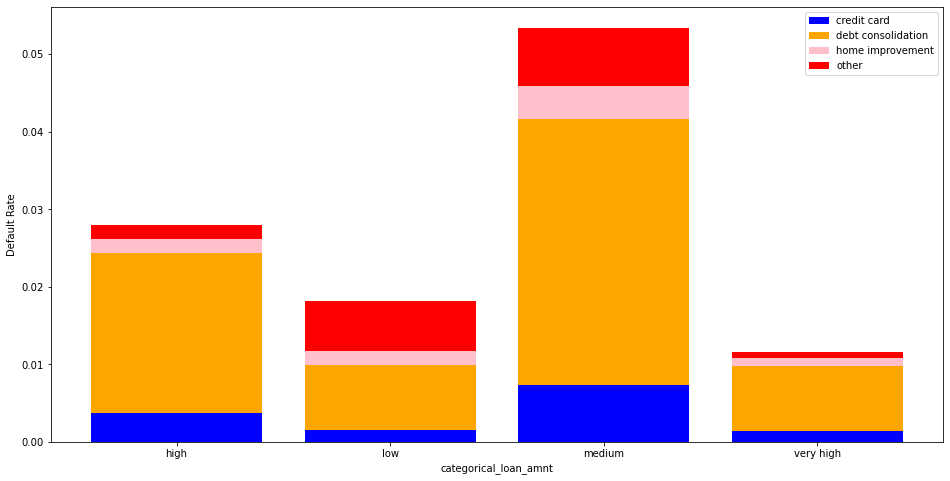

In [100]:
plot_segmented(loan_df1, 'categorical_loan_amnt')

> interest rate (`int_rate`)

In [99]:
# plot_segmented('categorical_int_rate')
# wrong threshold above, could not plot the default for each level for categorical interest rate

> `installment`

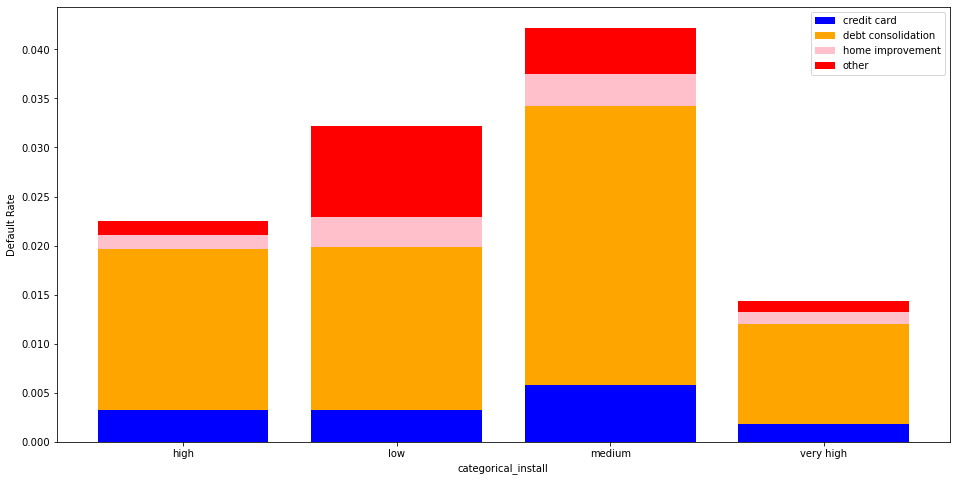

In [103]:
plot_segmented(loan_df1, 'categorical_install')

> debt-to-income (`dti`) ratio

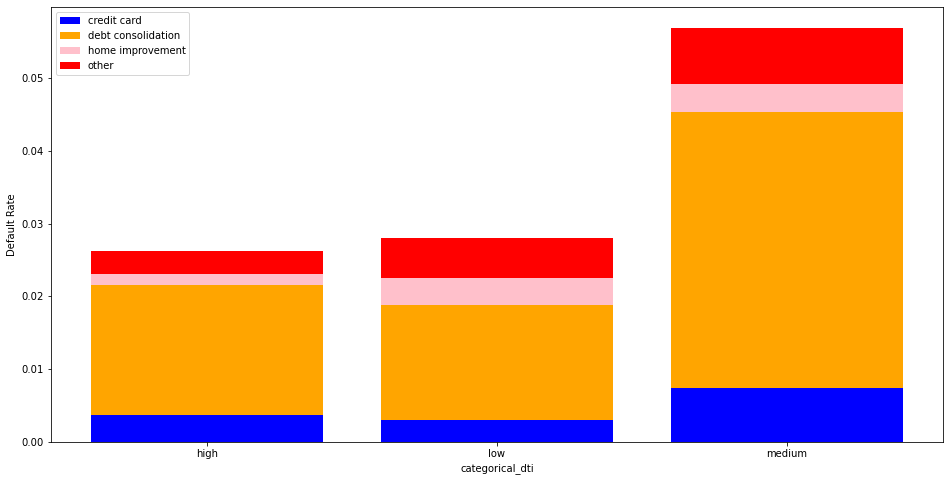

In [104]:
plot_segmented(loan_df1, 'categorical_dti')

> Let's have a look at the role of `annual_income`

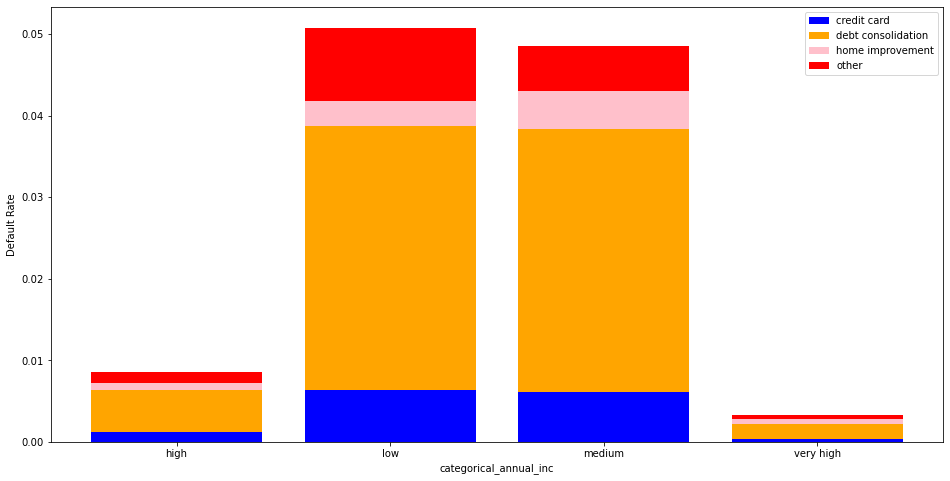

In [105]:
plot_segmented(loan_df1, 'categorical_annual_inc')

> A good way to quantify the effect of a categorical variable on default rate is to see `how much does the default rate vary across the categories`. 

> Let's see an example using `annual_inc` as the categorical variable.

> How would you examine the variation of default rate across `annual_inc`?

In [106]:
var_df = loan_df.copy()
var_df = var_df.groupby('categorical_annual_inc').sum()
var_df['default_rate'] = var_df.loan_status / len(loan_df)
var_df['default_rate'].max() # maximum value for default rate in annual income

0.06773466054903181

In [107]:
var_df['default_rate'].idxmax() # maximum value for default rate index

'low'

In [108]:
var_df['default_rate'].min() # minimum value for default rate in annual income

0.004225315602561112

In [109]:
var_df['default_rate'].idxmin() # minimum value for default rate index

'very high'

In [110]:
var_df['default_rate'].max() - var_df['default_rate'].min()

0.0635093449464707

Based on the result above, we could conclude that the spread for the default rate for annual income is 0.064 which represents the variation of default rate across various levels for annual income. The spread shows that variation of default rate for annual income is relatively large. 

#### Question 5.3 Write a function which takes in a categorical variable and computed the average default rate across the categories.

> You can also compute the `difference between the highest and the lowest default rate` across the categories, which is a decent metric indicating the effect of the varaible on default rate.

> Please create your own function named `diff_rate`.

In [111]:
def diff_rate(df, variable):
    var_df = df.copy()
    var_df = var_df.groupby(variable).sum()
    var_df['default_rate'] = var_df.loan_status / len(loan_df)
    max_rate = var_df['default_rate'].max()
    min_rate = var_df['default_rate'].min()
    return max_rate - min_rate


> Please use the function and draw some insights :)

In [112]:
diff_rate(loan_df, 'categorical_annual_inc') # same result as above

0.0635093449464707

> Thus, there is a ***`6.35%`*** increase in default rate as you go from high to low annual income. 

##### You might want to compute this difference for all the variables and roughly identify the ones that affect default rate the most.

In [113]:
diff_rate(loan_df, 'categorical_dti')

0.041112580034735724

### Variables in the Dataset

- `acc_now_delinq`	The number of accounts on which the borrower is now delinquent.
- `acc_open_past_24mths`	Number of trades opened in past 24 months.
- addr_state`	The state provided by the borrower in the loan application
- `all_util`	Balance to credit limit on all trades
- `annual_inc`	The self-reported annual income provided by the borrower during registration.
- `annual_inc_joint`	The combined self-reported annual income provided by the co-borrowers during registration
- `application_type`	Indicates whether the loan is an individual application or a joint application with two co-borrowers
- `avg_cur_bal`	Average current balance of all accounts
- `bc_open_to_buy`	Total open to buy on revolving bankcards.
- `bc_util`	Ratio of total current balance to high credit/credit limit for all bankcard accounts.
- `chargeoff_within_12_mths`	Number of charge-offs within 12 months
- `collection_recovery_fee`	post charge off collection fee
- `collections_12_mths_ex_med`	Number of collections in 12 months excluding medical collections
- `delinq_2yrs`	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
- `delinq_amnt`	The past-due amount owed for the accounts on which the borrower is now delinquent.
- `desc`	Loan description provided by the borrower
- `dti`	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
- `dti_joint`	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income
- `earliest_cr_line`	The month the borrower's earliest reported credit line was opened
- `emp_length`	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
- `emp_title`	The job title supplied by the Borrower when applying for the loan.*
- `fico_range_high`	The upper boundary range the borrower’s FICO at loan origination belongs to.
- `fico_range_low`	The lower boundary range the borrower’s FICO at loan origination belongs to.
- `funded_amnt`	The total amount committed to that loan at that point in time.
- `funded_amnt_inv`	The total amount committed by investors for that loan at that point in time.
- `grade`	LC assigned loan grade
- `home_ownership`	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
- `id`	A unique LC assigned ID for the loan listing.
- `il_util`	Ratio of total current balance to high credit/credit limit on all install acct
- `initial_list_status`	The initial listing status of the loan. Possible values are – W, F
- `inq_fi`	Number of personal finance inquiries
- `inq_last_12m`	Number of credit inquiries in past 12 months
- `inq_last_6mths`	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
- `installment`	The monthly payment owed by the borrower if the loan originates.
- `int_rate`	Interest Rate on the loan
- `issue_d`	The month which the loan was funded
- `last_credit_pull_d`	The most recent month LC pulled credit for this loan
- `last_fico_range_high`	The upper boundary range the borrower’s last FICO pulled belongs to.
- `last_fico_range_low`	The lower boundary range the borrower’s last FICO pulled belongs to.
- `last_pymnt_amnt`	Last total payment amount received
- `last_pymnt_d`	Last month payment was received
- `loan_amnt`	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
- `loan_status`	Current status of the loan
- `max_bal_bc`	Maximum current balance owed on all revolving accounts
- `member_id`	A unique LC assigned Id for the borrower member.
- `mo_sin_old_il_acct`	Months since oldest bank installment account opened
- `mo_sin_old_rev_tl_op`	Months since oldest revolving account opened
- `mo_sin_rcnt_rev_tl_op`	Months since most recent revolving account opened
- `mo_sin_rcnt_tl`	Months since most recent account opened
- `mort_acc`	Number of mortgage accounts.
- `mths_since_last_delinq`	The number of months since the borrower's last delinquency.
- `mths_since_last_major_derog`	Months since most recent 90-day or worse rating
- `mths_since_last_record`	The number of months since the last public record.
- `mths_since_rcnt_il`	Months since most recent installment accounts opened
- `mths_since_recent_bc`	Months since most recent bankcard account opened.
- `mths_since_recent_bc_dlq`	Months since most recent bankcard delinquency
- `mths_since_recent_inq`	Months since most recent inquiry.
- `mths_since_recent_revol_delinq`	Months since most recent revolving delinquency.
- `next_pymnt_d`	Next scheduled payment date
- `num_accts_ever_120_pd`	Number of accounts ever 120 or more days past due
- `num_actv_bc_tl`	Number of currently active bankcard accounts
- `num_actv_rev_tl`	Number of currently active revolving trades
- `num_bc_sats`	Number of satisfactory bankcard accounts
- `num_bc_tl`	Number of bankcard accounts
- `num_il_tl`	Number of installment accounts
- `num_op_rev_tl`	Number of open revolving accounts
- `num_rev_accts`	Number of revolving accounts
- `num_rev_tl_bal_gt_0`	Number of revolving trades with balance >0
- `num_sats`	Number of satisfactory accounts
- `num_tl_120dpd_2m`	Number of accounts currently 120 days past due (updated in past 2 months)
- `num_tl_30dpd`	Number of accounts currently 30 days past due (updated in past 2 months)
- `num_tl_90g_dpd_24m`	Number of accounts 90 or more days past due in last 24 months
- `num_tl_op_past_12m`	Number of accounts opened in past 12 months
- `open_acc`	The number of open credit lines in the borrower's credit file.
- `open_acc_6m`	Number of open trades in last 6 months
- `open_il_12m`	Number of installment accounts opened in past 12 months
- `open_il_24m`	Number of installment accounts opened in past 24 months
- `open_il_6m`	Number of currently active installment trades
- `open_rv_12m`	Number of revolving trades opened in past 12 months
- `open_rv_24m`	Number of revolving trades opened in past 24 months
- `out_prncp`	Remaining outstanding principal for total amount funded
- `out_prncp_inv`	Remaining outstanding principal for portion of total amount funded by investors
- `pct_tl_nvr_dlq`	Percent of trades never delinquent
- `percent_bc_gt_75`	Percentage of all bankcard accounts > 75% of limit.
- `policy_code`	publicly available policy_code=1; new products not publicly available policy_code=2"
- `pub_rec`	Number of derogatory public records
- `pub_rec_bankruptcies`	Number of public record bankruptcies
- `purpose`	A category provided by the borrower for the loan request. 
- `pymnt_plan`	Indicates if a payment plan has been put in place for the loan
- `recoveries`	post charge off gross recovery
- `revol_bal`	Total credit revolving balance
- `revol_util`	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- `sub_grade`	LC assigned loan subgrade
- `tax_liens`	Number of tax liens
- `term`	The number of payments on the loan. Values are in months and can be either 36 or 60.
- `title`	The loan title provided by the borrower
- `tot_coll_amt`	Total collection amounts ever owed
- `tot_cur_bal`	Total current balance of all accounts
- `tot_hi_cred_lim`	Total high credit/credit limit
- `total_acc`	The total number of credit lines currently in the borrower's credit file
- `total_bal_ex_mort`	Total credit balance excluding mortgage
- `total_bal_il`	Total current balance of all installment accounts
- `total_bc_limit`	Total bankcard high credit/credit limit
- `total_cu_tl`	Number of finance trades
- `total_il_high_credit_limit`	Total installment high credit/credit limit
- `total_pymnt`	Payments received to date for total amount funded
- `total_pymnt_inv`	Payments received to date for portion of total amount funded by investors
- `total_rec_int`	Interest received to date
- `total_rec_late_fee`	Late fees received to date
- `total_rec_prncp`	Principal received to date
- `total_rev_hi_lim`  	Total revolving high credit/credit limit
- `url`	URL for the LC page with listing data.
- `verification_status`	Indicates if income was verified by LC, not verified, or if the income source was verified
- `verified_status_joint`	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
- `zip_code`	The first 3 numbers of the zip code provided by the borrower in the loan application.

### <font color="green">"Thank you for putting your efforts into the exercise problem sets :)"</font>